In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("spam.csv" , encoding="latin-1")

In [3]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# Steps to create the project
# 1. Clean the data
# 2. EDA
# 3. Text preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvements
# 7. Website
# 8. Deploy

## Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Delete last 3 columns
df.drop(columns=["Unnamed: 2",'Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Rename the columns for understanding
df.rename(columns = {"v1":'Target','v2':'Text'} , inplace=True)

In [9]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# use label encoder change text to number
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['Target'] = encoder.fit_transform(df['Target'])

In [12]:
# check missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [13]:
# check for duplicates
df.duplicated().sum()

403

In [14]:
df = df.drop_duplicates(keep='first')

In [15]:
df.shape

(5169, 2)

## EDA

In [16]:
# Cbeck is the target column is imbalanced
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

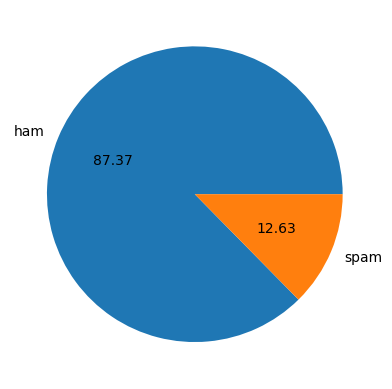

In [17]:
# check with visualization
plt.pie(df['Target'].value_counts(), labels=['ham','spam'],autopct="%0.2F")
plt.show()

In [18]:
# Data is imbalanced

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hrishabh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
# count number of characters
df['num_characters'] = df['Text'].apply(len)

In [22]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
# number of words
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
#  number of sentences
df['num_sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Target          5169 non-null   int32 
 1   Text            5169 non-null   object
 2   num_characters  5169 non-null   int64 
 3   num_words       5169 non-null   int64 
 4   num_sentences   5169 non-null   int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 222.1+ KB


In [27]:
df.describe()

,Target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [28]:
# check describe for ham
df[df['Target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
# check describe for spam
df[df['Target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [30]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

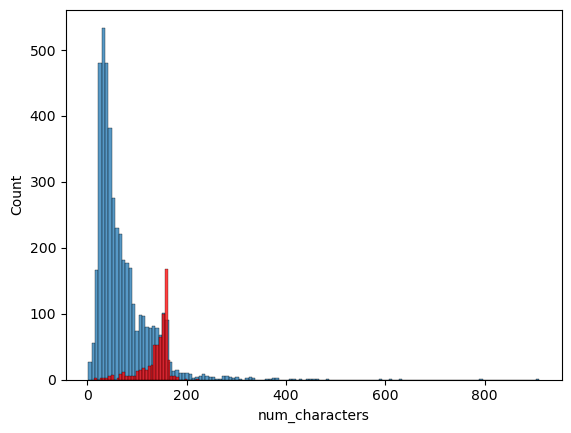

In [31]:
# Visualize

sns.histplot(df[df['Target'] == 0 ]['num_characters'], legend="ham")
sns.histplot(df[df['Target'] == 1 ]['num_characters'] , color="red",legend="spam")



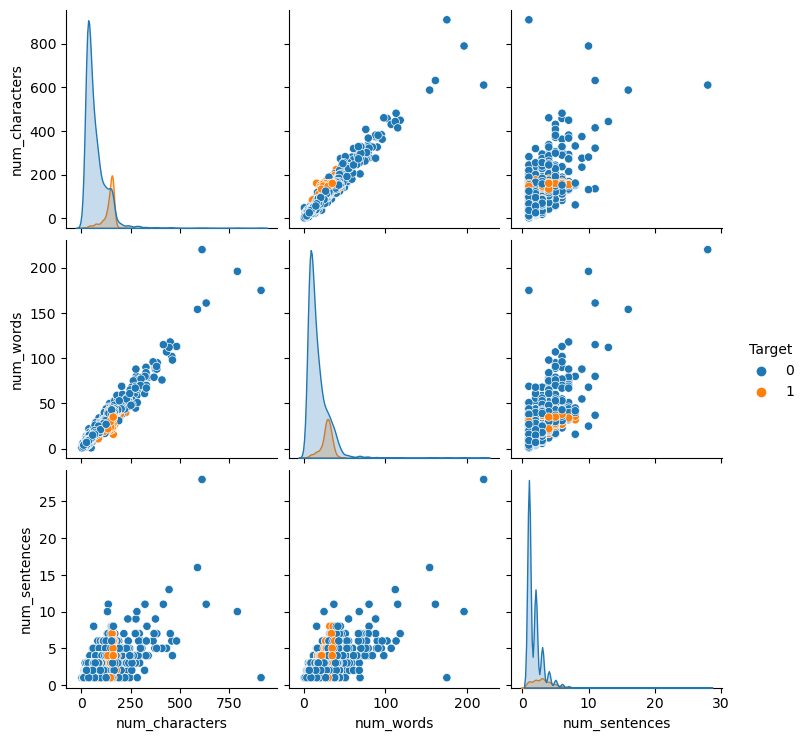

In [32]:
sns.pairplot(df,hue='Target')

In [33]:
#Examine correlation
df.corr()

C:\Users\hrishabh\AppData\Local\Temp\ipykernel_9892\4032060878.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Target,num_characters,num_words,num_sentences
Target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


C:\Users\hrishabh\AppData\Local\Temp\ipykernel_9892\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

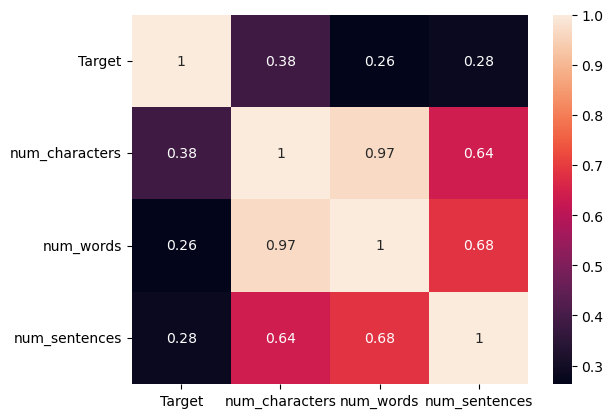

In [34]:
sns.heatmap(df.corr(),annot=True)

#### The conclusion from EDA
* All the independent value have high correlation so only one is kept
* Since num_character has max correlation with Target it is kept

#### DATA PREPROCESSING
* 1.Lower case
* 2.Tokenization
* 3.Remove special character
* 4.Remove stop word
* 5.stemming

In [35]:
# import some packages
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()



In [36]:
# Create a function for all these tasks

def text_transform(text):
    
    rtext = text.lower() #lower case
    
    rtext = nltk.word_tokenize(rtext) #tokenize the words
    
    y=[]
    for i in rtext:
        if i.isalnum():
            y.append(i)
    
    rtext = y[:]
    y.clear()
    
    for  i in rtext:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    rtext = y[:]
    y.clear()
    
    #stemming
    for i in rtext:
        y.append(ps.stem(i))
        
    return " ".join(y)
    
    
   

In [37]:
# testing
text_transform(df['Text'][0])


'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [38]:
# new column
df['Transformed_text'] = df['Text'].apply(text_transform)

In [39]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
!pip install wordcloud

In [41]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=12,background_color='white')

In [42]:
spam_wc = wc.generate(df[df['Target']==1]['Transformed_text'].str.cat(sep=" "))

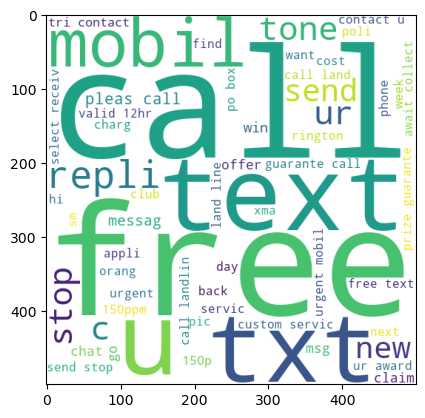

In [43]:
plt.imshow(spam_wc)

In [44]:
# Doing the same wiht the use of a fucntion
# find 30 most common words

spam_corpus = []
for sentences in df[df['Target']==1]['Transformed_text'].tolist():
    for word in sentences.split():
        spam_corpus.append(word)


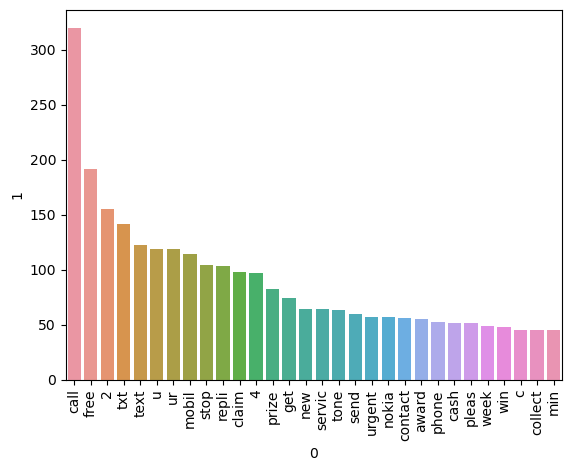

In [45]:
from collections import Counter
spam_30 = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=spam_30[0],y=spam_30[1])
plt.xticks(rotation ='vertical')
plt.show()

##### For Textual data First algorithm used in generally naive bayes 

### 4. Model Building

In [46]:
# Using bag of words method for vectorization of words


In [60]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer()

In [61]:
X = tf.fit_transform(df['Transformed_text']).toarray()

In [62]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
Y = df['Target'].values

In [64]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [65]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [66]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [67]:
gnB = GaussianNB()
mnB = MultinomialNB()
bnB = BernoulliNB()

In [68]:
gnB.fit(x_train,y_train)
y_pred1 = gnB.predict(x_test)

In [69]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


For this model
* Accuracy = 0.88
* precision = 0.53 
* Which is quite bad for a model

In [70]:
# Trying for multinomialNB
mnB.fit(x_train,y_train)
y_pred2 = mnB.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


For this model
* Accuracy = 0.96
* precision = 1
* which is best : we want a higher precision for a imbalanced dataset

In [71]:
# Trying for bernolieNB
bnB.fit(x_train,y_train)
y_pred3 = bnB.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


Not better than previous

 Creating  the model bsed on mnB 
* high precision is needed to avoid false positive

#### LETS try for all classification algorithm

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [78]:
svc = SVC(kernel="sigmoid" ,gamma=1.0)
knc=  KNeighborsClassifier()
mnB = MultinomialNB()
lrc = LogisticRegression(solver="liblinear")
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
 

In [79]:
dictionary_model = {
    'SVC' : svc,
    'KNN' : knc,
    'NB' : mnB,
    'LR' :lrc,
    'DT': dtc,
    'RF' : rfc   
}

In [80]:
def train_all_classifier(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [81]:
accuracy_scores = []
precision_scores =[]

for name,model in dictionary_model.items():
    
    this_accuracy , this_precision = train_all_classifier(model,x_train,y_train,x_test,y_test)
    
    print('Model used :',name)
    print("accuracy :",this_accuracy)
    print("precision :",this_precision)  
    
    accuracy_scores.append(this_accuracy)
    precision_scores.append(this_precision)
     

Model used : SVC
accuracy : 0.9729206963249516
precision : 0.9741379310344828
Model used : KNN
accuracy : 0.9003868471953579
precision : 1.0
Model used : NB
accuracy : 0.9593810444874274
precision : 1.0
Model used : LR
accuracy : 0.9477756286266924
precision : 0.9883720930232558
Model used : DT
accuracy : 0.9352030947775629
precision : 0.8380952380952381
Model used : RF
accuracy : 0.9738878143133463
precision : 1.0


In [84]:
performanc_df  = pd.DataFrame({
    'Algorithm' : dictionary_model.keys(),
    'Accuracy' : accuracy_scores,
    'Precision' : precision_scores,
}).sort_values('Precision',ascending=False)

In [85]:
performanc_df

,Algorithm,Accuracy,Precision
1,KNN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.973888,1.000000
3,LR,0.947776,0.988372
0,SVC,0.972921,0.974138
4,DT,0.935203,0.838095


### Now try to improve the model by improving the data

In [86]:
# Change the max feature for tfidf vectorizer
tf_max = TfidfVectorizer(max_features=3000)
X = tf_max.fit_transform(df['Transformed_text']).toarray()
X,Y

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 1, ..., 0, 0, 0]))

In [87]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [88]:
accuracy_scores1 = []
precision_scores1 =[]

for name,model in dictionary_model.items():
    
    this_accuracy , this_precision = train_all_classifier(model,x_train,y_train,x_test,y_test)
    
    print('Model used :',name)
    print("accuracy :",this_accuracy)
    print("precision :",this_precision)  
    
    accuracy_scores1.append(this_accuracy)
    precision_scores1.append(this_precision)
     

Model used : SVC
accuracy : 0.9758220502901354
precision : 0.9747899159663865
Model used : KNN
accuracy : 0.9052224371373307
precision : 1.0
Model used : NB
accuracy : 0.9709864603481625
precision : 1.0
Model used : LR
accuracy : 0.9564796905222437
precision : 0.979381443298969
Model used : DT
accuracy : 0.9274661508704062
precision : 0.8118811881188119
Model used : RF
accuracy : 0.9748549323017408
precision : 0.9827586206896551


In [94]:
temp_df  = pd.DataFrame({
    'Algorithm' : dictionary_model.keys(),
    'Accuracy_feat' : accuracy_scores1,
    'Precision_feat' : precision_scores1,
}).sort_values('Precision_feat',ascending=False)

In [97]:
performanc_df.merge(temp_df ,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_feat,Precision_feat
0,KNN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.973888,1.000000,0.974855,0.982759
3,LR,0.947776,0.988372,0.956480,0.979381
4,SVC,0.972921,0.974138,0.975822,0.974790
5,DT,0.935203,0.838095,0.927466,0.811881


In [99]:
# another changes can be scalling the data (0-1)
# for this model it is not applicable

In [101]:

# the concept of voting
# considering a combination of multiple model and compare with the best model
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('RF', rfc),('KNN',knc),('mb',mnB)] , voting='soft')

In [102]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('KNN', KNeighborsClassifier()),
                             ('mb', MultinomialNB())],
                 voting='soft')

In [103]:
y_pred_vot= voting.predict(x_test)
print("Accuracy ",accuracy_score(y_test,y_pred_vot))
print("Precision ",precision_score(y_test,y_pred_vot))

Accuracy  0.9526112185686654
Precision  1.0


So the max value for precision and accuracy is
* Multinomial naives bayes with features = 3000

### Creating the pipeline for the website

1. Vectorize

In [106]:
# Using pickle to pickup the respective function to file
import pickle
pickle.dump(tf_max ,open('Vectorizer.pkl','wb'))
pickle.dump(mnB ,open('Model.pkl','wb'))

In [105]:
final_pred = mnB.predict(x_test)
acc = accuracy_score(y_test,final_pred)
pre = precision_score(y_test,final_pred)
acc,pre

(0.9709864603481625, 1.0)